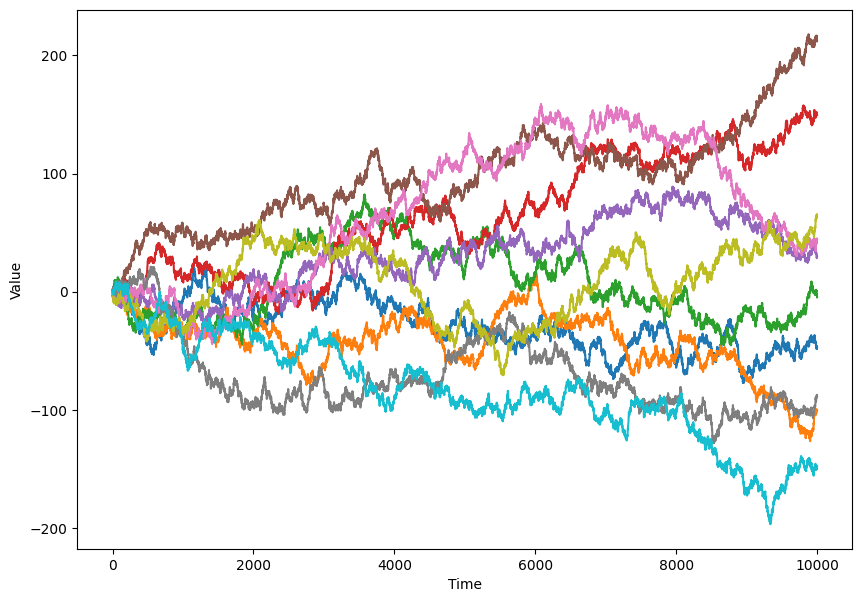

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

NUM_PATHS = 10
SAMPLES = 1000

MU = 0
SIGMA = 1

rng = np.random.default_rng()

def compute_wiener() -> list[float]:
    value = 0
    wiener = []

    for _ in range(SAMPLES):
        s = rng.normal(MU, SIGMA)
        value += s

        wiener.append(value)

    return wiener


df_data = {}
for i in range(NUM_PATHS):
    path = compute_wiener()
    df_data[f'WPath {i}'] = path

data = pd.DataFrame(df_data)

long_form = pd.melt(data.reset_index(), id_vars='index', var_name='Path', value_name='Value')
long_form.rename(columns={'index': 'Time'}, inplace=True)

plt.figure(figsize=(10, 7))
sns.lineplot(data=long_form, x='Time', y='Value', hue='Path')

plt.legend([], [], frameon=False)
plt.show()

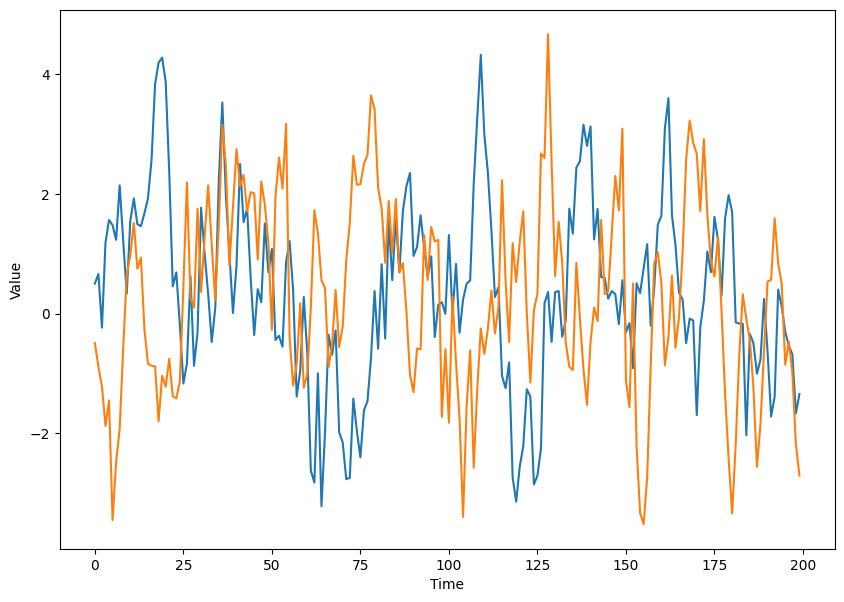

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

NUM_PATHS = 2
SAMPLES = 200
THETA = 0.2
MEAN = 0

MU = 0
SIGMA = 1

rng = np.random.default_rng()

def compute_wiener() -> list[float]:
    value = 0
    wiener = []

    for _ in range(SAMPLES):
        mean_rev_term = -THETA * (value - MEAN)
        s = mean_rev_term + rng.normal(MU, SIGMA)
        value += s

        wiener.append(value)

    return wiener


df_data = {}
for i in range(NUM_PATHS):
    path = compute_wiener()
    df_data[f'WPath {i}'] = path

data = pd.DataFrame(df_data)

long_form = pd.melt(data.reset_index(), id_vars='index', var_name='Path', value_name='Value')
long_form.rename(columns={'index': 'Time'}, inplace=True)

plt.figure(figsize=(10, 7))
sns.lineplot(data=long_form, x='Time', y='Value', hue='Path')

plt.legend([], [], frameon=False)
plt.show()